In [7]:
import sys
sys.path.append('..')  # Add parent directory to path
from utils.backtest import Backtest
from utils.data_handler import DataHandler

from strategies.price_to_book import PriceToBookStrategy
from strategies.momentum import MomentumStrategy
from utils.backtest import Backtest
from utils.data_handler import DataHandler
import yfinance as yf
import pandas as pd

[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy:


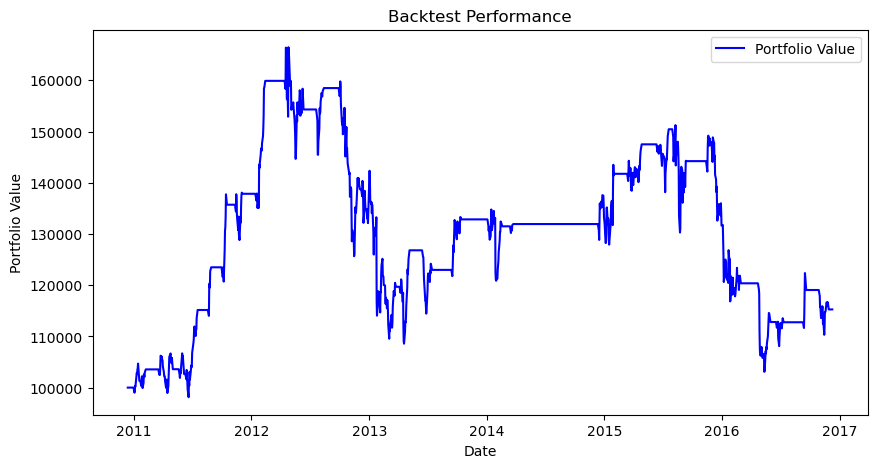


Results for weekly frequency:
Final Portfolio Value: $115,264.49
Total Return: 15.26%
Sharpe Ratio: 0.22
Max Drawdown: -38.08%

Testing monthly frequency strategy:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\price_to_book.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


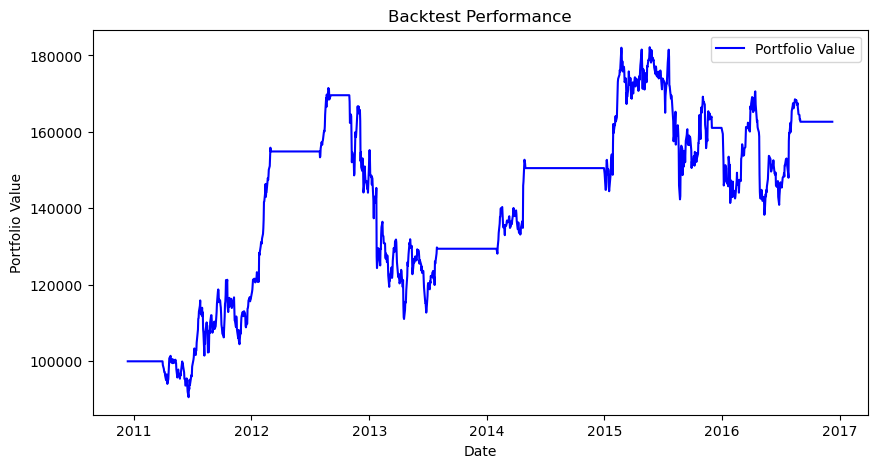


Results for monthly frequency:
Final Portfolio Value: $162,659.60
Total Return: 62.66%
Sharpe Ratio: 0.49
Max Drawdown: -35.23%

Testing 6month frequency strategy:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\price_to_book.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


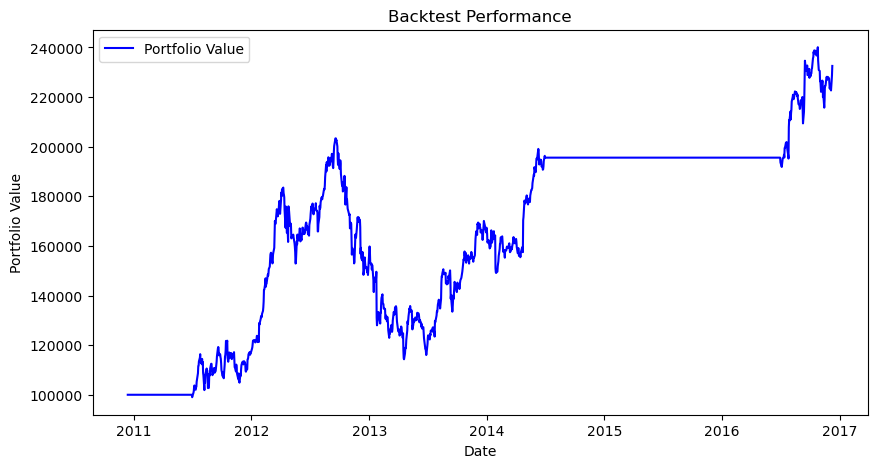


Results for 6month frequency:
Final Portfolio Value: $232,534.00
Total Return: 132.53%
Sharpe Ratio: 0.78
Max Drawdown: -43.80%

Testing yearly frequency strategy:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\price_to_book.py:53: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return data.resample(freq).last().dropna()


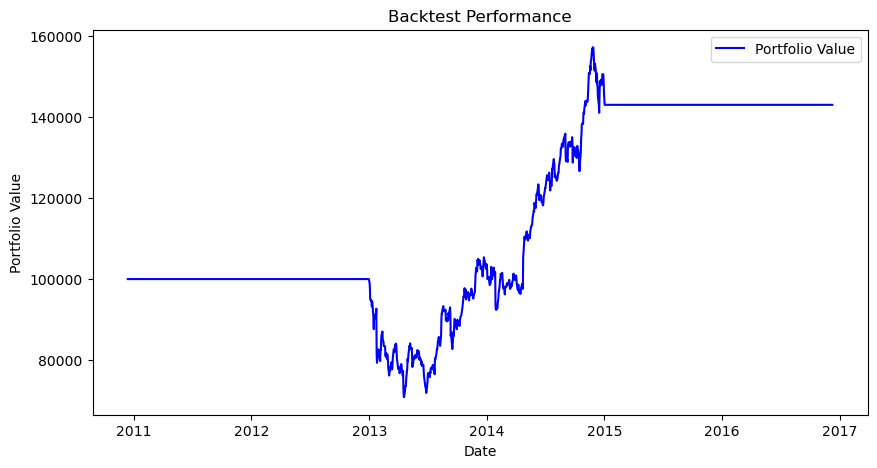


Results for yearly frequency:
Final Portfolio Value: $143,007.41
Total Return: 43.01%
Sharpe Ratio: 0.48
Max Drawdown: -29.16%

Strategy Comparison:
                   weekly      monthly       6month       yearly
Final Value   115264.4880  162659.6023  232534.0011  143007.4123
Total Return       0.1526       0.6266       1.3253       0.4301
Sharpe Ratio       0.2191       0.4890       0.7844       0.4827
Max Drawdown      -0.3808      -0.3523      -0.4380      -0.2916


In [9]:
data_handler = DataHandler(ticker='AAPL', start_date='2010-12-12', end_date='2016-12-12')
prices = data_handler.fetch_data()

# Assume pb_series is a pandas Series with P/B ratios indexed by date
pb_series = data_handler.fetch_pb_series('../data/price_to_book_ratio.csv')

# Test frequencies
frequencies = ['weekly', 'monthly', '6month', 'yearly']
results = {}

for freq in frequencies:
    print(f"\nTesting {freq} frequency strategy:")
    
    # Initialize strategy with current frequency
    strategy = PriceToBookStrategy(pb_series, window=5, k=0.5, frequency=freq)
    
    # Run backtest
    backtest = Backtest(
        data=prices,
        strategy=strategy,
    )
    
    # Store results
    results[freq] = backtest.run()
    
    # Plot signals
    strategy.plot_signals(prices)
    
    # Print metrics
    print(f"\nResults for {freq} frequency:")
    print(f"Final Portfolio Value: ${results[freq]['Final Value']:,.2f}")
    print(f"Total Return: {results[freq]['Return']:.2%}")
    print(f"Sharpe Ratio: {results[freq]['Sharpe Ratio']:.2f}")
    print(f"Max Drawdown: {results[freq]['Max Drawdown']:.2%}")
    
# Compare strategies
print("\nStrategy Comparison:")
comparison = pd.DataFrame({
    freq: {
        'Final Value': results[freq]['Final Value'],
        'Total Return': results[freq]['Return'],
        'Sharpe Ratio': results[freq]['Sharpe Ratio'],
        'Max Drawdown': results[freq]['Max Drawdown']
    }
    for freq in frequencies
}).round(4)

print(comparison)